In [1]:
import numpy as np
import xarray as xr
import cftime 
import matplotlib.pyplot as plt
from scipy import signal
import cartopy
import cartopy.crs as ccrs

C:\Users\Heather\anaconda3\envs\SAI_proj\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Loading in the AK time series files

##Jet
#U-wind/jet SAI

files_SAIJET = [
    'C:/Users/Heather/Documents/senior_research/alaska/jet_ak_sai.001.U.nc',
    'C:/Users/Heather/Documents/senior_research/alaska/jet_ak_sai.002.U.nc',
    'C:/Users/Heather/Documents/senior_research/alaska/jet_ak_sai.003.U.nc',
    'C:/Users/Heather/Documents/senior_research/alaska/jet_ak_sai.004.U.nc',
    'C:/Users/Heather/Documents/senior_research/alaska/jet_ak_sai.005.U.nc',
    'C:/Users/Heather/Documents/senior_research/alaska/jet_ak_sai.006.U.nc',
    'C:/Users/Heather/Documents/senior_research/alaska/jet_ak_sai.007.U.nc',
    'C:/Users/Heather/Documents/senior_research/alaska/jet_ak_sai.008.U.nc',
    'C:/Users/Heather/Documents/senior_research/alaska/jet_ak_sai.009.U.nc',
    'C:/Users/Heather/Documents/senior_research/alaska/jet_ak_sai.010.U.nc'
]

#U-wind/jet current

files_SSPJET = [
    'C:/Users/Heather/Documents/senior_research/alaska/jet_ak_curr.001.U.nc',
    'C:/Users/Heather/Documents/senior_research/alaska/jet_ak_curr.002.U.nc',
    'C:/Users/Heather/Documents/senior_research/alaska/jet_ak_curr.003.U.nc',
    'C:/Users/Heather/Documents/senior_research/alaska/jet_ak_curr.004.U.nc',
    'C:/Users/Heather/Documents/senior_research/alaska/jet_ak_curr.005.U.nc',
    'C:/Users/Heather/Documents/senior_research/alaska/jet_ak_curr.006.U.nc',
    'C:/Users/Heather/Documents/senior_research/alaska/jet_ak_curr.007.U.nc',
    'C:/Users/Heather/Documents/senior_research/alaska/jet_ak_curr.008.U.nc',
    'C:/Users/Heather/Documents/senior_research/alaska/jet_ak_curr.009.U.nc',
    'C:/Users/Heather/Documents/senior_research/alaska/jet_ak_curr.010.U.nc'
]

#u-wind/jet future

files_SSPJET_FUT = [
    'C:/Users/Heather/Documents/senior_research/alaska/jet_ak_fut.001.U.nc',
    'C:/Users/Heather/Documents/senior_research/alaska/jet_ak_fut.002.U.nc',
    'C:/Users/Heather/Documents/senior_research/alaska/jet_ak_fut.003.U.nc',
    'C:/Users/Heather/Documents/senior_research/alaska/jet_ak_fut.004.U.nc',
    'C:/Users/Heather/Documents/senior_research/alaska/jet_ak_fut.005.U.nc',
    'C:/Users/Heather/Documents/senior_research/alaska/jet_ak_fut.006.U.nc',
    'C:/Users/Heather/Documents/senior_research/alaska/jet_ak_fut.007.U.nc',
    'C:/Users/Heather/Documents/senior_research/alaska/jet_ak_fut.008.U.nc',
    'C:/Users/Heather/Documents/senior_research/alaska/jet_ak_fut.009.U.nc',
    'C:/Users/Heather/Documents/senior_research/alaska/jet_ak_fut.010.U.nc'
    
]
#U-Wind future

## 
#temperature Alaska SAI
files_TS_SAI=[
    'C:/Users/Heather/Documents/senior_research/alaska/ak_ts_sai.001.TS.nc',
    'C:/Users/Heather/Documents/senior_research/alaska/ak_ts_sai.002.TS.nc',
    'C:/Users/Heather/Documents/senior_research/alaska/ak_ts_sai.003.TS.nc',
    'C:/Users/Heather/Documents/senior_research/alaska/ak_ts_sai.004.TS.nc',
    'C:/Users/Heather/Documents/senior_research/alaska/ak_ts_sai.005.TS.nc',
    'C:/Users/Heather/Documents/senior_research/alaska/ak_ts_sai.006.TS.nc',
    'C:/Users/Heather/Documents/senior_research/alaska/ak_ts_sai.007.TS.nc',
    'C:/Users/Heather/Documents/senior_research/alaska/ak_ts_sai.008.TS.nc',
    'C:/Users/Heather/Documents/senior_research/alaska/ak_ts_sai.009.TS.nc',
    'C:/Users/Heather/Documents/senior_research/alaska/ak_ts_sai.010.TS.nc'
]

files_TEMPSSP=[
    'C:/Users/Heather/Documents/senior_research/alaska/ak_ssp_curr.001.TS.nc',
    'C:/Users/Heather/Documents/senior_research/alaska/ak_ssp_curr.002.TS.nc',
    'C:/Users/Heather/Documents/senior_research/alaska/ak_ssp_curr.003.TS.nc',
    'C:/Users/Heather/Documents/senior_research/alaska/ak_ssp_curr.004.TS.nc',
    'C:/Users/Heather/Documents/senior_research/alaska/ak_ssp_curr.005.TS.nc',
    'C:/Users/Heather/Documents/senior_research/alaska/ak_ssp_curr.006.TS.nc',
    'C:/Users/Heather/Documents/senior_research/alaska/ak_ssp_curr.007.TS.nc',
    'C:/Users/Heather/Documents/senior_research/alaska/ak_ssp_curr.008.TS.nc',
    'C:/Users/Heather/Documents/senior_research/alaska/ak_ssp_curr.009.TS.nc',
    'C:/Users/Heather/Documents/senior_research/alaska/ak_ssp_curr.010.TS.nc'
] 

files_TEMPSSP_FUT=[
    'C:/Users/Heather/Documents/senior_research/alaska/ak_ssp_fut.001.TS.nc',
    'C:/Users/Heather/Documents/senior_research/alaska/ak_ssp_fut.002.TS.nc',
    'C:/Users/Heather/Documents/senior_research/alaska/ak_ssp_fut.003.TS.nc',
    'C:/Users/Heather/Documents/senior_research/alaska/ak_ssp_fut.004.TS.nc',
    'C:/Users/Heather/Documents/senior_research/alaska/ak_ssp_fut.005.TS.nc',
    'C:/Users/Heather/Documents/senior_research/alaska/ak_ssp_fut.006.TS.nc',
    'C:/Users/Heather/Documents/senior_research/alaska/ak_ssp_fut.007.TS.nc',
    'C:/Users/Heather/Documents/senior_research/alaska/ak_ssp_fut.008.TSnc',
    'C:/Users/Heather/Documents/senior_research/alaska/ak_ssp_fut.009.TS.nc',
    'C:/Users/Heather/Documents/senior_research/alaska/ak_ssp_fut.010.TS.nc'
] 

#ENSO SAI

files_ENSOSAI=[
    'C:/Users/Heather/Documents/senior_research/alaska/enso_ts_sai.001.TS.nc',
    'C:/Users/Heather/Documents/senior_research/alaska/enso_ts_sai.002.TS.nc',
    'C:/Users/Heather/Documents/senior_research/alaska/enso_ts_sai.003.TS.nc',
    'C:/Users/Heather/Documents/senior_research/alaska/enso_ts_sai.004.TS.nc',
    'C:/Users/Heather/Documents/senior_research/alaska/enso_ts_sai.005.TS.nc',
    'C:/Users/Heather/Documents/senior_research/alaska/enso_ts_sai.006.TS.nc',
    'C:/Users/Heather/Documents/senior_research/alaska/enso_ts_sai.007.TS.nc',
    'C:/Users/Heather/Documents/senior_research/alaska/enso_ts_sai.008.TS.nc',
    'C:/Users/Heather/Documents/senior_research/alaska/enso_ts_sai.009.TS.nc',
    'C:/Users/Heather/Documents/senior_research/alaska/enso_ts_sai.010.TS.nc'
]  

#ENSO SSP
files_ENSOSSP=[
    'C:/Users/Heather/Documents/senior_research/alaska/enso_ssp_curr.001.TS.nc',
    'C:/Users/Heather/Documents/senior_research/alaska/enso_ssp_curr.002.TS.nc',
    'C:/Users/Heather/Documents/senior_research/alaska/enso_ssp_curr.003.TS.nc',
    'C:/Users/Heather/Documents/senior_research/alaska/enso_ssp_curr.004.TS.nc',
    'C:/Users/Heather/Documents/senior_research/alaska/enso_ssp_curr.005.TS.nc',
    'C:/Users/Heather/Documents/senior_research/alaska/enso_ssp_curr.006.TS.nc',
    'C:/Users/Heather/Documents/senior_research/alaska/enso_ssp_curr.007.TS.nc',
    'C:/Users/Heather/Documents/senior_research/alaska/enso_ssp_curr.008.TS.nc',
    'C:/Users/Heather/Documents/senior_research/alaska/enso_ssp_curr.009.TS.nc',
    'C:/Users/Heather/Documents/senior_research/alaska/enso_ssp_curr.010.TS.nc'
]   

files_ENSOSSP_FUT=[
    'C:/Users/Heather/Documents/senior_research/alaska/enso_ssp_fut.001.TS.nc',
    'C:/Users/Heather/Documents/senior_research/alaska/enso_ssp_fut.001.TS.nc',
    'C:/Users/Heather/Documents/senior_research/alaska/enso_ssp_fut.001.TS.nc',
    'C:/Users/Heather/Documents/senior_research/alaska/enso_ssp_fut.001.TS.nc',
    'C:/Users/Heather/Documents/senior_research/alaska/enso_ssp_fut.001.TS.nc',
    'C:/Users/Heather/Documents/senior_research/alaska/enso_ssp_fut.001.TS.nc',
    'C:/Users/Heather/Documents/senior_research/alaska/enso_ssp_fut.001.TS.nc',
    'C:/Users/Heather/Documents/senior_research/alaska/enso_ssp_fut.001.TS.nc',
    'C:/Users/Heather/Documents/senior_research/alaska/enso_ssp_fut.001.TS.nc',
    'C:/Users/Heather/Documents/senior_research/alaska/enso_ssp_fut.001.TS.nc'
    
]


In [3]:
files_ENSOSSP

['C:/Users/Heather/Documents/senior_research/alaska/enso_ssp_curr.001.TS.nc',
 'C:/Users/Heather/Documents/senior_research/alaska/enso_ssp_curr.002.TS.nc',
 'C:/Users/Heather/Documents/senior_research/alaska/enso_ssp_curr.003.TS.nc',
 'C:/Users/Heather/Documents/senior_research/alaska/enso_ssp_curr.004.TS.nc',
 'C:/Users/Heather/Documents/senior_research/alaska/enso_ssp_curr.005.TS.nc',
 'C:/Users/Heather/Documents/senior_research/alaska/enso_ssp_curr.006.TS.nc',
 'C:/Users/Heather/Documents/senior_research/alaska/enso_ssp_curr.007.TS.nc',
 'C:/Users/Heather/Documents/senior_research/alaska/enso_ssp_curr.008.TS.nc',
 'C:/Users/Heather/Documents/senior_research/alaska/enso_ssp_curr.009.TS.nc',
 'C:/Users/Heather/Documents/senior_research/alaska/enso_ssp_curr.010.TS.nc']

In [39]:
files_SAIJET

['C:/Users/Heather/Documents/senior_research/alaska/jet_ak_sai.001.U.nc',
 'C:/Users/Heather/Documents/senior_research/alaska/jet_ak_sai.002.U.nc',
 'C:/Users/Heather/Documents/senior_research/alaska/jet_ak_sai.003.U.nc',
 'C:/Users/Heather/Documents/senior_research/alaska/jet_ak_sai.004.U.nc',
 'C:/Users/Heather/Documents/senior_research/alaska/jet_ak_sai.005.U.nc',
 'C:/Users/Heather/Documents/senior_research/alaska/jet_ak_sai.006.U.nc',
 'C:/Users/Heather/Documents/senior_research/alaska/jet_ak_sai.007.U.nc',
 'C:/Users/Heather/Documents/senior_research/alaska/jet_ak_sai.008.U.nc',
 'C:/Users/Heather/Documents/senior_research/alaska/jet_ak_sai.009.U.nc',
 'C:/Users/Heather/Documents/senior_research/alaska/jet_ak_sai.010.U.nc']

In [44]:
xr.open_mfdataset('C:/Users/Heather/Documents/senior_research/alaska/jet_ak_curr.001.U.nc')

<xarray.Dataset>
Dimensions:  (time: 49, lev: 1)
Coordinates:
  * time     (time) datetime64[ns] 2015-07-01 2016-07-01 ... 2063-07-01
  * lev      (lev) float32 200.0
Data variables:
    U        (time, lev) float32 dask.array<chunksize=(49, 1), meta=np.ndarray>

In [38]:
xr.open_mfdataset('C:/Users/Heather/Documents/senior_research/alaska/enso_ts_sai.001.TS.nc')

<xarray.Dataset>
Dimensions:  (time: 34)
Coordinates:
  * time     (time) datetime64[ns] 2035-07-01 2036-07-01 ... 2068-07-01
Data variables:
    TS       (time) float32 dask.array<chunksize=(34,), meta=np.ndarray>

In [13]:
i = 0
for i in range(10):
    ds_enso_sai = xr.open_dataset(files_ENSOSAI[i])['TS']
    ds_enso_ssp = xr.open_dataset(files_ENSOSSP[i])['TS']
    ds_enso_ssp_fut = xr.open_dataset(files_ENSOSSP_FUT[i])['TS']
    
    # jet
    ds_jet_sai = xr.open_dataset(files_SAIJET[i])['U']
    ds_jet_ssp = xr.open_dataset(files_SSPJET[i])['U']
    ds_jet_ssp_fut = xr.open_dataset(files_SSPJET_FUT[i])['U']

    # temp AK
    ds_temp_sai = xr.open_dataset(files_TS_SAI[i])['TS']
    ds_temp_ssp = xr.open_dataset(files_TEMPSSP[i])['TS']
    ds_temp_ssp_fut = xr.open_dataset(files_TEMPSSP_FUT[i])['TS']
        
    #ds_enso_ssp_current = ds_enso_ssp.sel(time=slice('2015-07-01T00:00:00.000000000','2035-06-01T00:00:00.000000000'))
    #ds_jet_ssp_current  = ds_jet_ssp.sel( time=slice('2015-07-01T00:00:00.000000000','2035-06-01T00:00:00.000000000'))
    #ds_temp_ssp_current = ds_temp_ssp.sel(time=slice('2015-07-01T00:00:00.000000000','2035-06-01T00:00:00.000000000'))
    
    #print(ds_enso_ssp_current.coords['time'])
    #print(ds_enso_ssp_future.coords['time'])

ValueError: did not find a match in any of xarray's currently installed IO backends ['netcdf4', 'scipy']. Consider explicitly selecting one of the installed engines via the ``engine`` parameter, or installing additional IO dependencies, see:
http://xarray.pydata.org/en/stable/getting-started-guide/installing.html
http://xarray.pydata.org/en/stable/user-guide/io.html

In [4]:
# enso
ds_enso_sai = xr.open_dataset(files_ENSOSAI[0])['TS'] #good
ds_enso_ssp = xr.open_dataset(files_ENSOSSP[0])['TS'] #good
ds_enso_ssp_fut = xr.open_dataset(files_ENSOSSP_FUT[0])['TS'] #good


# jet
ds_jet_sai = xr.open_dataset(files_SAIJET[0])['U'] #good
ds_jet_ssp = xr.open_dataset(files_SSPJET[0])['U'] #go back
ds_jet_ssp_fut = xr.open_dataset(files_SSPJET_FUT[0])['U'] #values but go back


# temp AK
ds_temp_sai = xr.open_dataset(files_TS_SAI[0])['TS'] #good
ds_temp_ssp = xr.open_dataset(files_TEMPSSP[0])['TS'] #good
ds_temp_ssp_fut = xr.open_dataset(files_TEMPSSP_FUT[0])['TS'] #good

In [5]:
ds_jet_sai = xr.open_dataset(files_SAIJET[0])['U']

In [6]:
ds_temp_ssp_fut

<xarray.DataArray 'TS' (time: 35)>
array([273.77716, 274.5199 , 275.1861 , 272.96866, 274.12576, 271.91498,
       274.15002, 274.93155, 275.15067, 275.51657, 274.6743 , 273.01163,
       272.42145, 274.6064 , 274.45175, 275.39822, 275.69406, 276.42392,
       275.94254, 275.5975 , 273.98465, 276.46945, 277.3972 , 274.34824,
       274.78748, 275.0296 , 275.69385, 276.8998 , 273.96603, 274.89636,
       276.80307, 273.92944, 275.747  , 274.50894, 276.48923], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2065-07-01 2066-07-01 ... 2099-07-01

In [25]:
ds_enso_ssp

<xarray.DataArray 'TS' (time: 49)>
array([302.12357, 301.00204, 302.58932, 299.4755 , 298.70914, 300.88544,
       302.40482, 299.29517, 300.64807, 302.43002, 301.88672, 301.09143,
       301.98663, 303.349  , 299.2609 , 300.5216 , 302.3527 , 300.6152 ,
       301.31848, 303.82565, 299.98392, 300.5486 , 303.61905, 300.43704,
       303.08908, 299.5404 , 299.24466, 302.16077, 303.5449 , 300.3326 ,
       303.2161 , 302.07437, 302.82916, 303.0967 , 301.57724, 302.21875,
       303.72903, 299.57077, 301.19745, 303.303  , 304.26486, 301.6379 ,
       301.83212, 303.62152, 301.82907, 304.1946 , 301.4282 , 302.55225,
       301.39706], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2015-07-01 2016-07-01 ... 2063-07-01

In [7]:
# split ssp climates (current and future)
# focusing on DJF (July-June)

# current = 2015-2035
ds_enso_ssp_current = ds_enso_ssp.sel(time=slice('2015-07-01T00:00:00.000000000','2035-06-01T00:00:00.000000000'))
ds_jet_ssp_current  = ds_jet_ssp.sel( time=slice('2015-07-01T00:00:00.000000000','2035-06-01T00:00:00.000000000'))
ds_temp_ssp_current = ds_temp_ssp.sel(time=slice('2015-07-01T00:00:00.000000000','2035-06-01T00:00:00.000000000'))

# future = 2035-2069
ds_enso_ssp_future = ds_enso_ssp.sel(time=slice('2035-07-01T00:00:00.000000000','2069-06-01T00:00:00.000000000'))
ds_jet_ssp_future  = ds_jet_ssp.sel( time=slice('2035-07-01T00:00:00.000000000','2069-06-01T00:00:00.000000000'))
ds_temp_ssp_future = ds_temp_ssp.sel(time=slice('2035-07-01T00:00:00.000000000','2069-06-01T00:00:00.000000000'))

In [9]:
# double checking values are correct for current and future (looks good!)
print(ds_enso_ssp_current.coords['time'])
print(ds_enso_ssp_future.coords['time'])

<xarray.DataArray 'time' (time: 20)>
array(['2015-07-01T00:00:00.000000000', '2016-07-01T00:00:00.000000000',
       '2017-07-01T00:00:00.000000000', '2018-07-01T00:00:00.000000000',
       '2019-07-01T00:00:00.000000000', '2020-07-01T00:00:00.000000000',
       '2021-07-01T00:00:00.000000000', '2022-07-01T00:00:00.000000000',
       '2023-07-01T00:00:00.000000000', '2024-07-01T00:00:00.000000000',
       '2025-07-01T00:00:00.000000000', '2026-07-01T00:00:00.000000000',
       '2027-07-01T00:00:00.000000000', '2028-07-01T00:00:00.000000000',
       '2029-07-01T00:00:00.000000000', '2030-07-01T00:00:00.000000000',
       '2031-07-01T00:00:00.000000000', '2032-07-01T00:00:00.000000000',
       '2033-07-01T00:00:00.000000000', '2034-07-01T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2015-07-01 2016-07-01 ... 2034-07-01
<xarray.DataArray 'time' (time: 29)>
array(['2035-07-01T00:00:00.000000000', '2036-07-01T00:00:00.000000000',
       

In [10]:
enso = ds_enso_ssp_current
jet = ds_jet_ssp_current
#precip = ds_prec_ssp_current
temperature = ds_temp_ssp_current

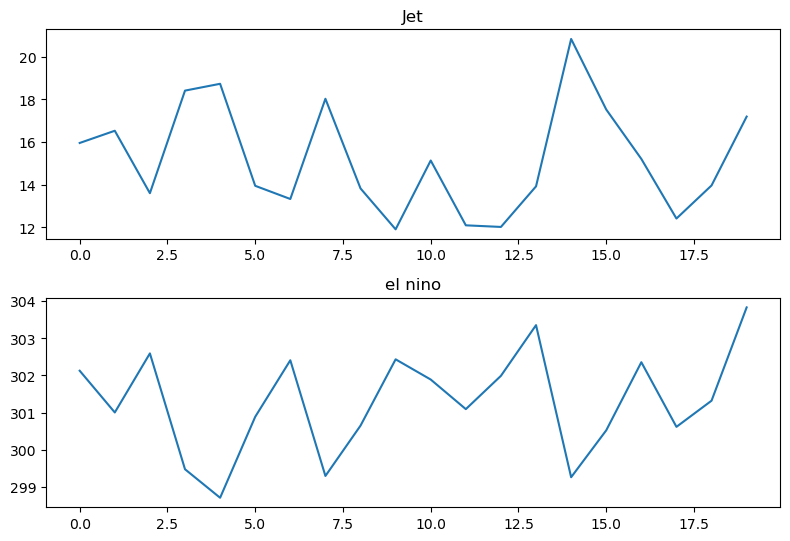

In [11]:
fig = plt.figure(figsize=(8, 8))
#plt.subplot(311)
#plt.plot(precip)
#plt.title('precip')
plt.subplot(312)
plt.plot(jet)
plt.title('Jet')
plt.subplot(313)
plt.plot(enso)
plt.title('el nino')
plt.tight_layout()
plt.show()

In [49]:
# z-score
ENSO = (enso - np.mean(enso.data)) / np.std(enso.data)
JET  = (jet - np.mean(jet.data)) / np.std(jet.data)
CA   = (temperature - np.mean(temperature.data)) / np.std(temperature.data)

In [50]:
ENSO_detrend = signal.detrend(ENSO.data)
JET = signal.detrend(JET.data)
CA = signal.detrend(CA.data)

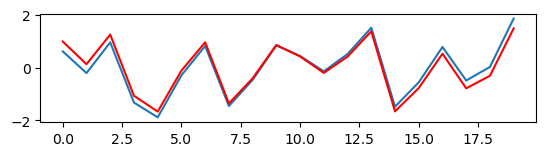

In [14]:
plt.subplot(311)
plt.plot(ENSO)
plt.plot(ENSO_detrend, 'r')
plt.show()

In [15]:
import statsmodels.api as sm

In [58]:
#================================================================
# Determine the effect of ENSO on CA conditioned on Jet
#================================================================
print(len(ENSO_detrend))
print(len(JET))
X = np.stack([ENSO_detrend, JET]).T


Y = CA[:]


model = sm.OLS(Y, X)
results = model.fit()

ce_enso_ca_cond_jet = results.params[0]
ce_jet_ca = results.params[1]

print("The regression coeff of ENSO on CA conditioned on Jet is ", round(ce_enso_ca_cond_jet,2))
print("The regression coeff. of Jet on CA is ", round(ce_jet_ca,2))

with open('reg_ce_jet_ca_current.txt', 'a') as f:
    f.write(str(round(ce_jet_ca,2)) + '\n')
    f.close() 

with open('reg_ce_enso_ca_cond_jet_current.txt', 'a') as f:
    f.write(str(round(ce_enso_ca_cond_jet,2)) + '\n')
    f.close() 

20
20
The regression coeff of ENSO on CA conditioned on Jet is  0.48
The regression coeff. of Jet on CA is  2444990.5


In [59]:
#================================================================
# Determine the causal effect of ENSO on CA 
#================================================================
X = ENSO_detrend[:]
Y = CA[:]

model = sm.OLS(Y, X)
results = model.fit()

ce_enso_ca = results.params[0]

print("The causal effect of ENSO on CA is ", round(ce_enso_ca,2))

with open('ce_enso_ca_current.txt', 'a') as f:
    f.write(str(round(ce_enso_ca,2)) + '\n')
    f.close() 

The causal effect of ENSO on CA is  0.51


In [60]:
#================================================================
# Determine the causal effect of ENSO on Jet
#================================================================
X = ENSO_detrend[:]
Y = JET[:]

model = sm.OLS(Y, X)
results = model.fit()

ce_enso_jet = results.params[0]

print("The causal effect of ENSO on Jet is ", round(ce_enso_jet, 2))

with open('ce_enso_jet_current.txt', 'a') as f:
    f.write(str(round(ce_enso_jet,2)) + '\n')
    f.close() 

The causal effect of ENSO on Jet is  0.0


In [61]:
#================================================================
# Determine the causal effect of Jet on CA
#================================================================
X = JET[:]
Y = CA[:]

model = sm.OLS(Y, X)
results = model.fit()

ce_jet_ca = results.params[0]

print("The causal effect of Jet on CA is ", round(ce_jet_ca, 2))

with open('ce_jet_ca_current.txt', 'a') as f:
    f.write(str(round(ce_jet_ca,2)) + '\n')
    f.close() 

The causal effect of Jet on CA is  3129535.2


In [62]:
enso = ds_enso_ssp_future
jet = ds_jet_ssp_future
#precip = ds_prec_ssp_future
temperature = ds_temp_ssp_future

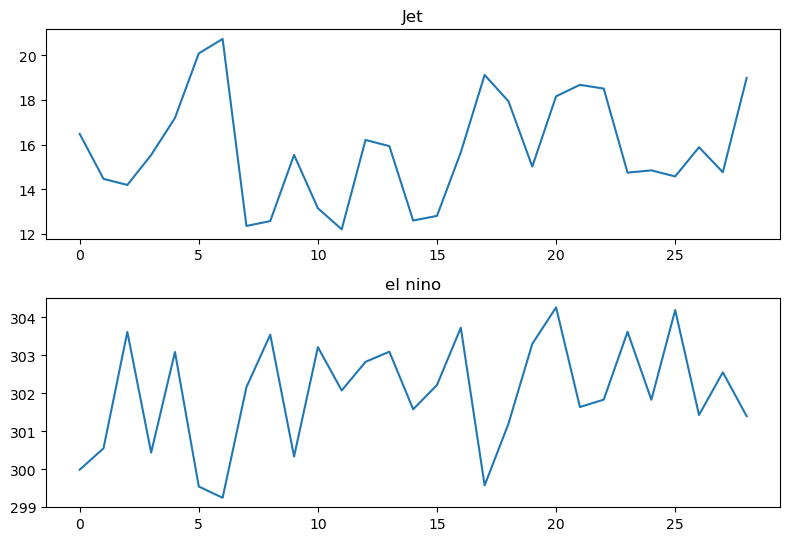

In [63]:
fig = plt.figure(figsize=(8, 8))
plt.subplot(312)
plt.plot(jet)
plt.title('Jet')
plt.subplot(313)
plt.plot(enso)
plt.title('el nino')
plt.tight_layout()
plt.show()

In [65]:
ENSO = (enso - np.mean(enso.data)) / np.std(enso.data)
JET = (jet - np.mean(jet.data)) / np.std(jet.data)
CA = (temperature - np.mean(temperature.data)) / np.std(temperature.data)

In [66]:
ENSO_detrend = signal.detrend(ENSO.data)
JET = signal.detrend(JET.data)
CA = signal.detrend(CA.data)

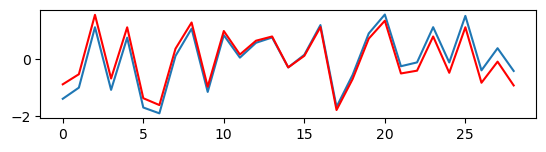

In [67]:
plt.subplot(311)
plt.plot(ENSO)
plt.plot(ENSO_detrend, 'r')
plt.show()

In [329]:
import statsmodels.api as sm

In [69]:
ENSO_detrend.shape

(29,)

In [70]:
JET.shape

(29, 1)

In [71]:
#================================================================
# Determine the effect of ENSO on CA conditioned on Jet
#================================================================
JET = np.reshape(JET, -1)
X = np.stack([ENSO_detrend, JET]).T

Y = CA[:]

model = sm.OLS(Y, X)
results = model.fit()

ce_enso_ca_cond_jet = results.params[0]
ce_jet_ca = results.params[1]

print("The regression coeff of ENSO on CA conditioned on Jet is ", round(ce_enso_ca_cond_jet,2))
print("The regression coeff. of Jet on CA is ", round(ce_jet_ca,2))

with open('reg_ce_enso_ca_cond_jet_future.txt', 'w') as f:
    f.write(str(round(ce_enso_ca_cond_jet,2)) + '\n')
    f.close() 

with open('reg_ce_jet_ca_future.txt', 'a') as f:
    f.write(str(round(ce_jet_ca,2)) + '\n')
    f.close() 

The regression coeff of ENSO on CA conditioned on Jet is  0.45
The regression coeff. of Jet on CA is  511898.47


In [72]:
#================================================================
# Determine the causal effect of ENSO on CA 
#================================================================
X = ENSO_detrend[:]
Y = CA[:]

model = sm.OLS(Y,X)
results = model.fit()

ce_enso_ca = results.params[0]

print("The causal effect of ENSO on CA is ", round(ce_enso_ca,2))

with open('ce_enso_ca_future.txt', 'a') as f:
    f.write(str(round(ce_enso_ca,2)) + '\n')
    f.close() 

The causal effect of ENSO on CA is  0.46


In [73]:
#================================================================
# Determine the causal effect of ENSO on Jet
#================================================================
X = ENSO_detrend[:]
Y = JET[:]

model = sm.OLS(Y,X)
results = model.fit()

ce_enso_jet = results.params[0]

print("The causal effect of ENSO on Jet is ", round(ce_enso_jet,2))

with open('ce_enso_jet_future.txt', 'a') as f:
    f.write(str(round(ce_enso_jet,2)) + '\n')
    f.close() 

The causal effect of ENSO on Jet is  0.0


In [74]:
#================================================================
# Determine the causal effect of Jet on CA
#================================================================
X = JET[:]
Y = CA[:]

model = sm.OLS(Y,X)
results = model.fit()

ce_jet_ca = results.params[0]

print("The causal effect of Jet on CA is ", round(ce_jet_ca,2))

with open('ce_jet_ca_future.txt', 'a') as f:
    f.write(str(round(ce_jet_ca,2)) + '\n')
    f.close() 

The causal effect of Jet on CA is  3340168.8


In [75]:
enso = ds_enso_sai
jet = ds_jet_sai
temperature = ds_temp_sai

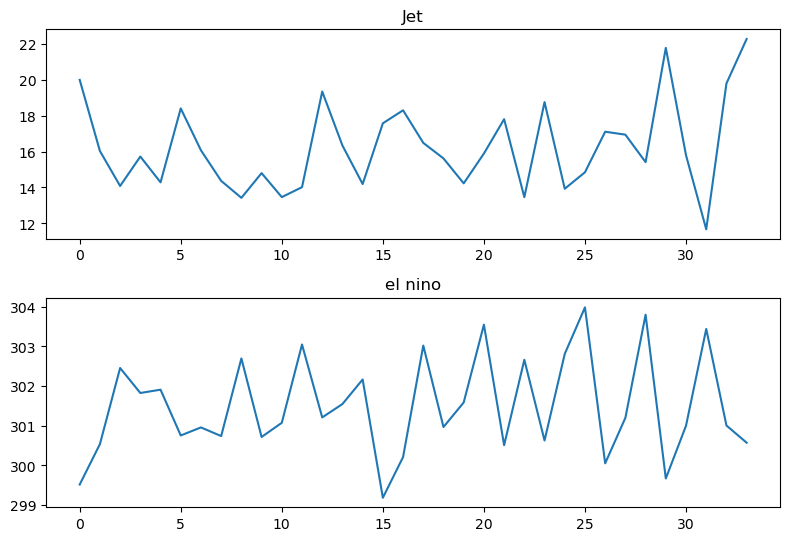

In [76]:
fig = plt.figure(figsize=(8, 8))
plt.subplot(312)
plt.plot(jet)
plt.title('Jet')
plt.subplot(313)
plt.plot(enso)
plt.title('el nino')
plt.tight_layout()
plt.show()

In [77]:
ENSO = (enso - np.mean(enso.data)) / np.std(enso.data)
JET = (jet - np.mean(jet.data)) / np.std(jet.data)
CA = (temperature - np.mean(temperature.data)) / np.std(temperature.data)

In [78]:
ENSO_detrend = signal.detrend(ENSO.data)
JET = signal.detrend(JET.data)
CA = signal.detrend(CA.data)

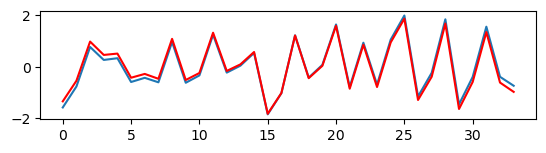

In [79]:
plt.subplot(311)
plt.plot(ENSO)
plt.plot(ENSO_detrend, 'r')
plt.show()

In [81]:
#================================================================
# Determine the effect of ENSO on CA conditioned on Jet
#================================================================
JET = np.reshape(JET, -1)
X = np.stack([ENSO_detrend, JET]).T

Y = CA[:]

model = sm.OLS(Y,X)
results = model.fit()

ce_enso_ca_cond_jet = results.params[0]
ce_jet_ca = results.params[1]

print("The regression coeff of ENSO on CA conditioned on Jet is ", round(ce_enso_ca_cond_jet,2))
print("The regression coeff. of Jet on CA is ", round(ce_jet_ca,2))

with open('reg_ce_enso_ca_cond_jet_sai.txt', 'a') as f:
    f.write(str(round(ce_enso_ca_cond_jet,2)) + '\n')
    f.close() 

with open('reg_ce_jet_ca_sai.txt', 'a') as f:
    f.write(str(round(ce_jet_ca,2)) + '\n')
    f.close() 

The regression coeff of ENSO on CA conditioned on Jet is  0.6
The regression coeff. of Jet on CA is  -827465.1


In [82]:
#================================================================
# Determine the causal effect of ENSO on CA 
#================================================================
X = ENSO_detrend[:]
Y = CA[:]

model = sm.OLS(Y,X)
results = model.fit()

ce_enso_ca = results.params[0]

print("The causal effect of ENSO on CA is ", round(ce_enso_ca,2))

with open('ce_enso_ca_sai.txt', 'a') as f:
    f.write(str(round(ce_enso_ca,2)) + '\n')
    f.close() 

The causal effect of ENSO on CA is  0.59


In [83]:
#================================================================
# Determine the causal effect of ENSO on Jet
#================================================================
X = ENSO_detrend[:]
Y = JET[:]

model = sm.OLS(Y,X)
results = model.fit()

ce_enso_jet = results.params[0]

print("The causal effect of ENSO on Jet is ", round(ce_enso_jet,2))

with open('ce_enso_jet_sai.txt', 'a') as f:
    f.write(str(round(ce_enso_jet,2)) + '\n')
    f.close() 

The causal effect of ENSO on Jet is  0.0


In [84]:
#================================================================
# Determine the causal effect of Jet on CA
#================================================================
X = JET[:]
Y = CA[:]

model = sm.OLS(Y,X)
results = model.fit()

ce_jet_ca = results.params[0]

print("The causal effect of Jet on CA is ", round(ce_jet_ca,2))

with open('ce_jet_ca_sai.txt', 'a') as f:
    f.write(str(round(ce_jet_ca,2)) + '\n')
    f.close() 

The causal effect of Jet on CA is  3421768.8
